In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import itertools
import pandas as pd
import math
import random

In [3]:
#Read the index dictionary
#Revert the index 
index_name = 'seqs_index.dict'

index_dict = {}

with open(index_name, 'r') as f:
    for line in f:
        L = line.split('\t')
        index_dict[L[1][:-1]] = int(L[0])
        

from os import listdir
from os.path import isfile, join
import os
WD = os.getcwd()
mypath = WD + '/data'
file_output = WD + '/'+ 'seqs_index.dict'

#Obtain the file names
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
data_dict = {}
data_dict[43] = {}
data_dict[30] = {}


#a = onlyfiles[0]
#Interpret file name, and extract step number from it

for a in onlyfiles:    
    if a[0] == 'c':
        step = int(a.split('-')[1][1:])
        t=43
        print(f'step={step} for t={t}')
    elif a[0] == '3':
        step = int(a.split('-')[2])
        t=30
        print(f'step={step} for t={t}')
    
    file_name = WD + '/data/' + a
    seq_2_ab = {}
    with open(file_name, 'r') as r:
        for line in r:
            if line[0] == '>':
                abundance = int(line.split('-')[1][:-1])
                #print(abundance)
            else:
                sequence = line[:-1]
                hapl = index_dict[sequence]
                seq_2_ab[hapl]= abundance
    data_dict[t][step] = seq_2_ab
    
df = {}
#Upload data to DataFrame
df[43] = pd.DataFrame([])
df[30] = pd.DataFrame([])
df[43] = pd.DataFrame.from_dict(data_dict[43])
df[30] = pd.DataFrame.from_dict(data_dict[30])
df[43] = df[43].fillna(0)
df[30] = df[30].fillna(0)

step=36 for t=30
step=28 for t=30
step=34 for t=43
step=46 for t=43
step=58 for t=30
step=22 for t=30
step=16 for t=43
step=40 for t=30
step=42 for t=43
step=18 for t=30
step=12 for t=43
step=44 for t=30
step=40 for t=43
step=44 for t=43
step=58 for t=43
step=22 for t=43
step=4 for t=30
step=38 for t=30
step=56 for t=43
step=12 for t=30
step=42 for t=30
step=30 for t=30
step=34 for t=30
step=14 for t=43
step=38 for t=43
step=30 for t=43
step=32 for t=43
step=60 for t=43
step=16 for t=30
step=14 for t=30
step=26 for t=30
step=26 for t=43
step=46 for t=30
step=50 for t=43
step=48 for t=43
step=10 for t=43
step=6 for t=30
step=54 for t=30
step=8 for t=43
step=2 for t=43
step=2 for t=30
step=54 for t=43
step=4 for t=43
step=52 for t=30
step=52 for t=43
step=56 for t=30
step=48 for t=30
step=1 for t=43
step=20 for t=43
step=20 for t=30
step=32 for t=30
step=28 for t=43
step=36 for t=43
step=6 for t=43
step=50 for t=30
step=60 for t=30
step=10 for t=30
step=25 for t=30
step=23 for t=30
step=

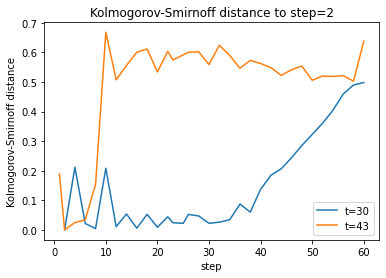

In [52]:
temps = [30, 43]

for t in temps:
    df_t = df[t]

    L = list(df_t.columns)
    L.sort()
    n = len(L)
    r_max = 50000

    abundances = np.zeros((n, r_max))
    cum_abundances = np.zeros((n, r_max))

    for i,step in enumerate(L):
        vector = df_t[step]
        # Normalize by 1
        vector = vector / vector.sum()
        #vector = vector.sort_values(ascending=False)
        vector = vector.tolist()
        # Do rank

        abundances[i]= vector[:r_max]
        cum_abundances[i][0] = abundances[i][0]

        for j in range(1,r_max):
            cum_abundances[i][j] = cum_abundances[i][j-1] + abundances[i][j]
    st = 2

    for i in range(n):
        if L[i] == st:
            break
    origin = cum_abundances[i]
    dist_KS = []

    for step in range(n):

        x = cum_abundances[step]
        d = 0

        for e in range(r_max):
            diff = math.fabs(origin[e]-x[e])

            if diff > d:
                d = diff
            else:
                pass

        dist_KS.append(d)
    plt.plot(L, dist_KS, label=f't={t}')
    plt.ylabel('Kolmogorov-Smirnoff distance')
    plt.xlabel('step')
    plt.legend()
plt.title(f'Kolmogorov-Smirnoff distance to step={st}')
plt.savefig('dist_KS_2origin.png')

In [1]:
index_dict

NameError: name 'index_dict' is not defined

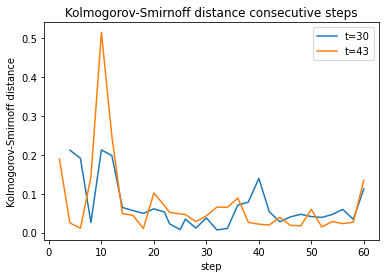

In [53]:
temps = [30, 43]

for t in temps:
    df_t = df[t]

    L = list(df_t.columns)
    L.sort()
    n = len(L)
    r_max = 50000

    abundances = np.zeros((n, r_max))
    cum_abundances = np.zeros((n, r_max))

    for i,step in enumerate(L):
        vector = df_t[step]
        # Normalize by 1
        vector = vector / vector.sum()
        #vector = vector.sort_values(ascending=False)
        vector = vector.tolist()
        # Do rank

        abundances[i]= vector[:r_max]
        cum_abundances[i][0] = abundances[i][0]

        for j in range(1,r_max):
            cum_abundances[i][j] = cum_abundances[i][j-1] + abundances[i][j]

    dist_KS = []

    for step in range(1,n):
        
        origin = cum_abundances[step-1]
        x = cum_abundances[step]
        d = 0

        for e in range(r_max):
            diff = math.fabs(origin[e]-x[e])

            if diff > d:
                d = diff
            else:
                pass

        dist_KS.append(d)
    plt.plot(L[1:], dist_KS, label=f't={t}')
    plt.ylabel('Kolmogorov-Smirnoff distance')
    plt.xlabel('step')
    plt.legend()
plt.title(f'Kolmogorov-Smirnoff distance consecutive steps')
plt.savefig('dist_KS_consec.png')

In [54]:
dist_KS

[0.18914874767369405,
 0.024900789014270064,
 0.011209157395320801,
 0.1425896711641558,
 0.5146351069491474,
 0.24687352758234005,
 0.04883830578837012,
 0.04461771795771352,
 0.010740682112519329,
 0.1020015678904641,
 0.06967652856630069,
 0.05197957091923966,
 0.04648224255982231,
 0.028435562705296846,
 0.0431231019733096,
 0.06556828539579496,
 0.06492738337116644,
 0.08895923315866572,
 0.02643766352147059,
 0.021747274389107618,
 0.019506936856806212,
 0.03933044341781228,
 0.018832213751220017,
 0.017592173885920548,
 0.05974227749052069,
 0.014474836976038685,
 0.028612879871994568,
 0.023205878842723016,
 0.026925744814098707,
 0.1345691053909568]

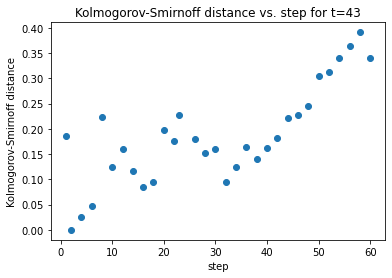